In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns

Text(0, 0.5, 'Probabilitas')

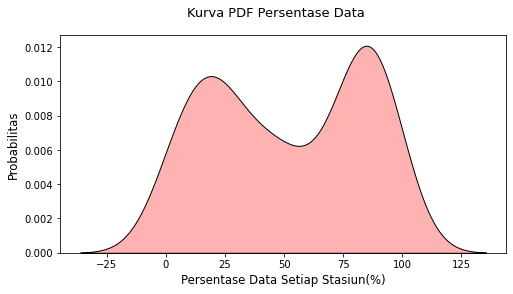

In [2]:
persendt= pd.read_excel("D:/Nu/Draft/Hasil/Persentase Dataa.xlsx")
#plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,4))
sns.kdeplot(data = persendt, x='Persentase', fill=True, edgecolor='k',color = 'r', alpha = .3)
plt.suptitle("Kurva PDF Persentase Data", size = 13)
plt.xlabel('Persentase Data Setiap Stasiun(%)', size = 11.7)
plt.ylabel('Probabilitas', size=11.7)
#plt.legend()

Text(0, 0.5, 'Probabilitas')

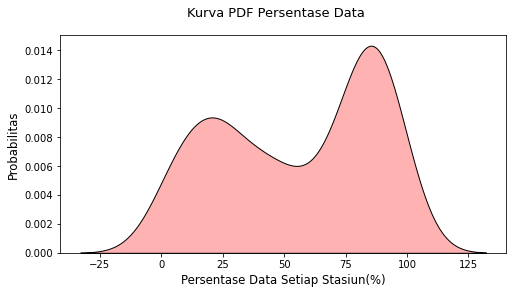

In [3]:
persendt= pd.read_excel("D:/Nu/Draft/Hasil/Persentase Dataall.xlsx")
#plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,4))
sns.kdeplot(data = persendt, x='Persentase', fill=True, edgecolor='k',color = 'r', alpha = .3)
plt.suptitle("Kurva PDF Persentase Data", size = 13)
plt.xlabel('Persentase Data Setiap Stasiun(%)', size = 11.7)
plt.ylabel('Probabilitas', size=11.7)
#plt.legend()

Text(0, 0.5, 'Probability')

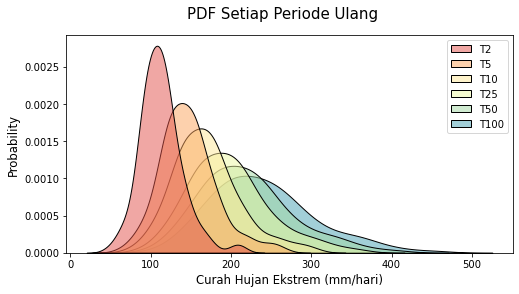

In [4]:
dataset = pd.read_excel("D:/Nu/Draft/Hasil/Tabel Ch_pd_ulang/Baru All_Curah Hujan Periode Ulang Stasiun BMKG.xlsx")
dataset1 = pd.read_excel("D:/Nu/Draft/Hasil/Tabel Ch_pd_ulang/Baru All_Curah Hujan Periode Ulang Stasiun BMKG.xlsx", sheet_name ='chT_stasiun')
#plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,4))
#for i in enumerate (cols):   
#plt.subplot(2,3,i[0]+1)
ac = sns.kdeplot(data=dataset1, fill=True, edgecolor='k', palette = "Spectral", alpha = .5)
plt.suptitle("PDF Setiap Periode Ulang", size = 15)
plt.xlabel('Curah Hujan Ekstrem (mm/hari)', size = 11.7)
plt.ylabel('Probability', size=11.7)

In [5]:
#satusatu
#plt.figure(figsize = (8,4))
#sns.kdeplot(data=tabl2, x='T2', fill=True, edgecolor ='r', color='#e2514a',alpha=.4)
#plt.suptitle("PDF T2", size = 15)

In [6]:
dataset1

,Stasiun,T2,T5,T10,T25,T50,T100
0,Halim Perdana Kusuma Jakarta,85.843577,125.893711,152.410384,185.914271,210.769368,235.440939
1,Pos Pengamatan Kahang-Kahang,87.430292,138.067806,171.594246,213.954992,245.380613,276.574192
2,Stasiun Geofisika Aceh Selatan,84.546188,102.286842,114.032699,128.873619,139.883462,150.812010
3,Stasiun Geofisika Bandung,79.403270,97.571009,109.599633,124.797830,136.072722,147.264361
4,Stasiun Geofisika Deli Serdang,108.919817,139.654101,160.002871,185.713595,204.787279,223.720127
...,...,...,...,...,...,...,...
111,Stasiun Meteorologi Tjilik Riwut,129.469853,178.074619,210.255203,250.915457,281.079556,311.020928
112,Stasiun Meteorologi Torea,164.433097,217.507292,252.647027,297.046175,329.984000,362.678617
113,Stasiun Meteorologi Tunggul Wulung,66.996845,86.862526,100.015335,116.633944,128.962578,141.200179
114,Stasiun Meteorologi Umbu Mehang Kunda,85.673844,119.166143,141.340959,169.358897,190.144205,210.776037


## ...

In [7]:
import os
os.environ['PROJ_LIB'] = 'C:/Users/USER/anaconda3/pkgs/proj-8.0.1-h1cfcee9_0/Library/share'
from mpl_toolkits.basemap import Basemap, maskoceans,cm

In [8]:
lat_g = dataset[['Lat']].values
lon_g = dataset[['Lon']].values
t2 = dataset['T2'].values
t5 = dataset['T5'].values
t10 = dataset['T10'].values
t25 = dataset['T25'].values
t50 = dataset['T50'].values
t100 = dataset['T100'].values

In [9]:
#t2_g = dataset['T2']

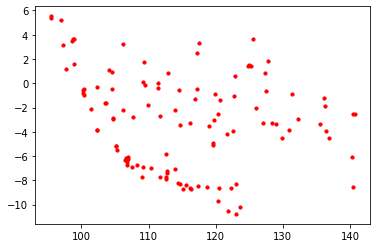

In [10]:
m = Basemap(projection='cyl',llcrnrlon=90,llcrnrlat=-14,
            urcrnrlon=150,urcrnrlat=14,resolution='h')

lon_g, lat_g = m(lon_g, lat_g)
plt.scatter(lon_g, lat_g, 10, marker='o', color='Red') 
#clevs = np.arange(-8,32,4)

## Plot Stasiun 

Text(0.5, 1.0, 'Lokasi Stasiun Yang Digunakan')

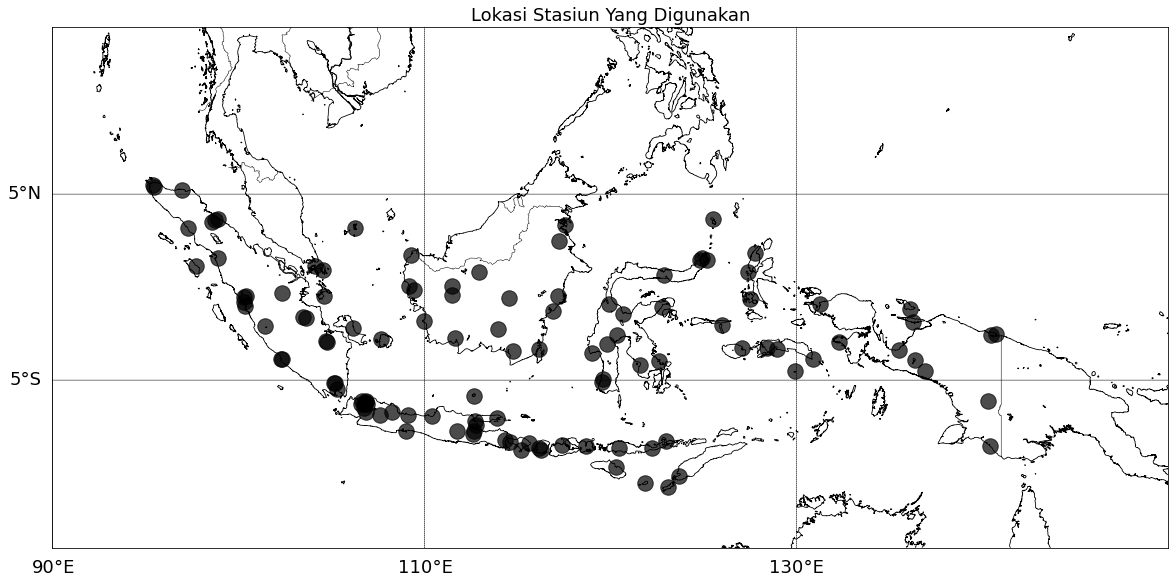

In [11]:
#Lokasi Stasiun yang digunakan

fig=plt.figure(figsize=(20,15))

m.drawcoastlines(linewidth=.8)
m.drawstates()
m.drawcountries()
#m.shadedrelief()

parallels = np.arange(-15,15,10)
#labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,0,True,1],fontsize=18, color='k')
meridians = np.arange(90,150,20)
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=18, color='k')

plt.scatter(lon_g, lat_g, 155**2/100, marker='o',color='k', alpha=.7, edgecolor = 'k')
plt.title("Lokasi Stasiun Yang Digunakan", size =18)

### Pengelompokan berd. rentang nilai, std 

In [23]:
df5 = pd.read_excel("D:/Nu/Draft/Hasil/Tabel Ch_pd_ulang/Baru All_Curah Hujan Periode Ulang Stasiun BMKG.xlsx", sheet_name='T5baru_Q')
lat5_p1 = df5[['Lat1']].values
lon5_p1 = df5[['Lon1']].values
lat5_p2 = df5[['Lat2']].values
lon5_p2 = df5[['Lon2']].values
lat5_p3 = df5[['Lat3']].values
lon5_p3 = df5[['Lon3']].values

lat5_p4 = df5[['Lat4']].values
lon5_p4 = df5[['Lon4']].values
lat5_p5 = df5[['Lat5']].values
lon5_p5 = df5[['Lon5']].values
lat5_p6 = df5[['Lat6']].values
lon5_p6 = df5[['Lon6']].values
t5_p1 = df5['T2_1']
t5_p2 = df5['T2_2']
t5_p3 = df5['T2_3']
t5_p4 = df5['T2_4']
t5_p5 = df5['T2_5']
t5_p6 = df5['T2_6']

ValueError: Worksheet named 'T5baru_Q' not found

NameError: name 'lon5_p1' is not defined

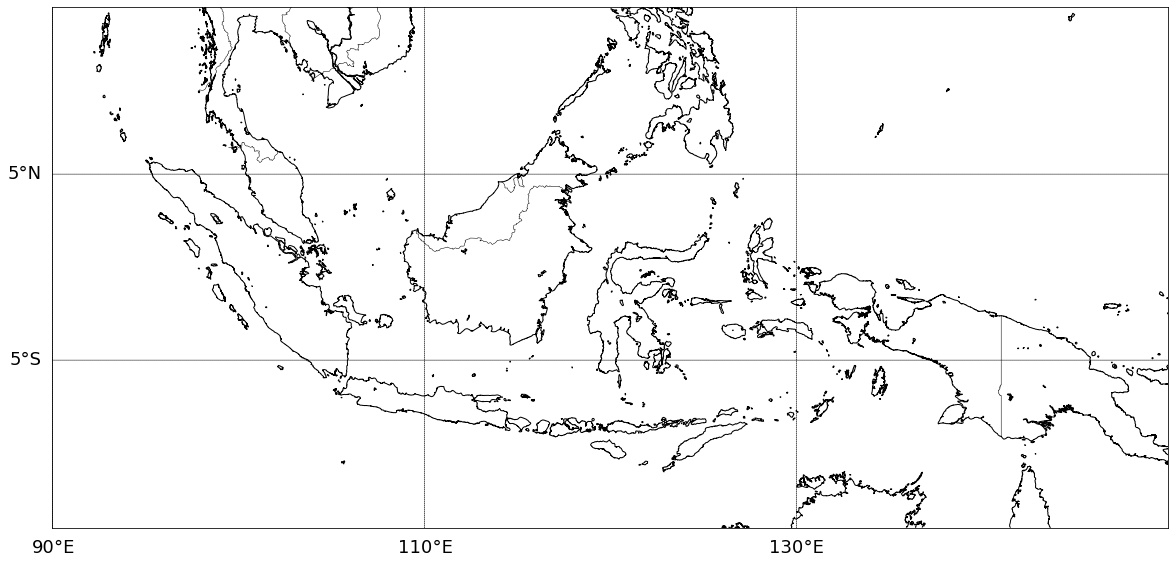

In [24]:
#nilai ch ekstrem dalam map
fig=plt.figure(figsize=(20,15))

m.drawcoastlines(linewidth=1)
m.drawstates()
m.drawcountries()
#m.shadedrelief()

parallels = np.arange(-15,15,10)
#labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,0,True,1],fontsize=18, color='k')
meridians = np.arange(90,150,20)
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=18, color='k')

plt.scatter(lon5_p1, lat5_p1, t5_p1**2/100, marker='o', color='blue', alpha=.8, edgecolor = 'k', label = 'Cluster 1') 
plt.scatter(lon5_p2, lat5_p2, t5_p2**2/100, marker='o', color='orange', alpha=.8, edgecolor = 'k', label = 'Cluster 2') 
plt.scatter(lon5_p3, lat5_p3, t5_p3**2/100, marker='o', color='green', alpha=.8, edgecolor = 'k', label = 'Cluster 3')

plt.scatter(lon5_p4, lat5_p4, t5_p4**2/100, marker='o', color='red', alpha=.8, edgecolor = 'k', label = 'Cluster 4') 
plt.scatter(lon5_p5, lat5_p5, t5_p5**2/100, marker='o', color='purple', alpha=.8, edgecolor = 'k', label = 'Cluster 5') 
plt.scatter(lon5_p6, lat5_p6, t5_p6**2/100, marker='o', color='k', alpha=.8, edgecolor = 'k', label = 'Cluster 6')
plt.legend()

In [ ]:
df5

In [ ]:
df5= df5.set_axis(['S', 'L', 'L', 'Cluster 1', 'S', 'L', 'L', 'Cluster 2','S', 'L', 'L', 'Cluster 3','S', 'L', 'L', 'Cluster 4', 'S', 'L', 'L', 'Cluster 5', 'S', 'L', 'L', 'Cluster 6'], axis=1)
df5.head()

In [ ]:
#dataset = pd.read_excel("D:/Nu/Draft/Hasil/Tabel Ch_pd_ulang/All_Curah Hujan Periode Ulang Stasiun BMKG.xlsx")
#ct2w5 = pd.read_excel("clustert525.xlsx", sheet_name ='t525')
#plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,4))
#for i in enumerate (cols):   
#plt.subplot(2,3,i[0]+1)

sns.kdeplot(data=df5.iloc[:,[3,7,11,15,19,23]], fill=True, edgecolor='k', palette= 'flare', alpha = .75)
plt.suptitle("PDF Klasterisasi Persentil T5", size = 13)
plt.xlabel('Curah Hujan Ekstrem T5 (mm/hari)', size = 11.7)
plt.ylabel('Probability', size=11.7)
#plt.legend()

## T2 & T5

In [ ]:
dataset = pd.read_excel("D:/Nu/Draft/Hasil/Tabel Ch_pd_ulang/All_Curah Hujan Periode Ulang Stasiun BMKG.xlsx")

In [ ]:
#T2 = X2.iloc[:, [2]].values
T2w5 = dataset.iloc[:, [3,4]]
T2w5v= T2w5.values
lon = dataset["Lon"].values
lat = dataset["Lat"].values
#T2w5

In [ ]:
plt.figure(figsize=(7, 4))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(T2w5v, method='ward'))

In [ ]:
plt.figure(figsize=(7, 4))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(T2w5v, method='ward'))
plt.axhline(y=105, color='r', linestyle='--')

In [ ]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
Y25 = cluster.fit_predict(T2w5v)
#T2w5["cluster"]= Y25
#T2w5.to_excel('clustert2w5.xlsx')

In [ ]:
#plt.figure(figsize=(7, 4))  
#plt.scatter(T2w5['T2'], T2w5['T5'], c=cluster.labels_)
#plt.title('T2 dan T5 Hierarchical Clustering')
#plt.xlabel('T2')
#plt.ylabel('T5')

In [ ]:
#plt.figure(figsize=(7, 4)) 
#plt.scatter(T2w5v[cluster.labels_ == 0,0], T2w5v[cluster.labels_== 0,1], s=100,  c= 'blue', edgecolor = 'k',
#            alpha =.8, label = 'Cluster 1')
#plt.scatter(T2w5v[cluster.labels_ == 1,0], T2w5v[cluster.labels_== 1,1], s=100,  c = 'orange', edgecolor = 'k',
#            alpha =.8, label = 'Cluster 2')
#plt.scatter(T2w5v[cluster.labels_ == 3,0], T2w5v[cluster.labels_== 3,1], s=100,  c = 'green', edgecolor = 'k',
#           alpha =.8, label = 'Cluster 2')
#plt.scatter(T2w5v[cluster.labels_ == 2,0], T2w5v[cluster.labels_== 2,1], s=100,  c = 'red', edgecolor = 'k',
#            alpha =.8, label = 'Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
#plt.title('Hierarchical Clustering (T2 & T5)')
#plt.xlabel('T2')
#plt.ylabel('T5')
#plt.legend()
#plt.show()

In [ ]:
fig=plt.figure(figsize=(20,15))

m.drawcoastlines(linewidth=.8)
m.drawstates()
m.drawcountries()
#m.shadedrelief()

parallels = np.arange(-15,15,10)
#labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,0,True,1],fontsize=18, color='k')
meridians = np.arange(90,150,20)
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=18, color='k')


plt.scatter(lon[cluster.labels_==0], lat[cluster.labels_==0], T2w5v[cluster.labels_ == 0,0]**2/100, c ='blue', 
            edgecolor='k', alpha=.8, label = 'Cluster 1')
plt.scatter(lon[cluster.labels_==0], lat[cluster.labels_==0], T2w5v[cluster.labels_ == 0,1]**2/100, c ='blue', 
            edgecolor='k', alpha=.8)

plt.scatter(lon[cluster.labels_==3], lat[cluster.labels_==3], T2w5v[cluster.labels_ == 3,0]**2/100, c ='green',
            edgecolor='k', alpha=.8, label = 'Cluster 2')
plt.scatter(lon[cluster.labels_==3], lat[cluster.labels_==3], T2w5v[cluster.labels_ == 3,1]**2/100, c ='green',
            edgecolor='k', alpha=.8)

plt.scatter(lon[cluster.labels_==1], lat[cluster.labels_==1], T2w5v[cluster.labels_ == 1,0]**2/100, c ='orange',
            edgecolor='k', alpha=.8, label = 'Cluster 3')
plt.scatter(lon[cluster.labels_==1], lat[cluster.labels_==1], T2w5v[cluster.labels_ == 1,1]**2/100, c ='orange',
            edgecolor='k', alpha=.8)

plt.scatter(lon[cluster.labels_==2], lat[cluster.labels_==2], T2w5v[cluster.labels_ == 2,0]**2/100, c ='red',
            edgecolor='k', alpha=.8, label = 'Cluster 4' )
plt.scatter(lon[cluster.labels_==2], lat[cluster.labels_==2], T2w5v[cluster.labels_ == 2,1]**2/100, c ='red',
            edgecolor='k', alpha=.8,)

plt.scatter(lon[cluster.labels_==4], lat[cluster.labels_==4], T2w5v[cluster.labels_ == 4,0]**2/100, c ='purple',
            edgecolor='k', alpha=.8, label = 'Cluster 4' )
plt.scatter(lon[cluster.labels_==4], lat[cluster.labels_==4], T2w5v[cluster.labels_ == 4,1]**2/100, c ='purple',
            edgecolor='k', alpha=.8,)

#plt.scatter(lon[cluster.labels_==5], lat[cluster.labels_==5], T2w5v[cluster.labels_ == 5,0]**2/100, c ='k',
#            edgecolor='k', alpha=.8, label = 'Cluster 4' )
#plt.scatter(lon[cluster.labels_==5], lat[cluster.labels_==5], T2w5v[cluster.labels_ == 5,1]**2/100, c ='k',
#            edgecolor='k', alpha=.8,)

#plt.scatter(lon[cluster.labels_==5], lat[cluster.labels_==5], T2w5v[cluster.labels_ == 5,0]**2/100, c ='magenta',
#            edgecolor='k', alpha=.8, label = 'Cluster 4' )
#plt.scatter(lon[cluster.labels_==5], lat[cluster.labels_==5], T2w5v[cluster.labels_ == 5,1]**2/100, c ='magenta',
#            edgecolor='k', alpha=.8,)


plt.title('Spasial CH Ekstrem Hierarchical Clustering (T2 & T5')

plt.legend()

In [ ]:
#dataset = pd.read_excel("D:/Nu/Draft/Hasil/Tabel Ch_pd_ulang/All_Curah Hujan Periode Ulang Stasiun BMKG.xlsx")
ct2w5 = pd.read_excel("clustert2w5.xlsx", sheet_name ='t2w5')
#plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,4))
#for i in enumerate (cols):   
#plt.subplot(2,3,i[0]+1)

sns.kdeplot(data=ct2w5, fill=True, edgecolor='k', palette= 'Spectral_r', alpha = .85)
plt.suptitle("PDF T5 Klasterisasi Hierarki T2 dan T5", size = 13)
plt.xlabel('Curah Hujan Ekstrem T5 (mm/hari)', size = 11.7)
plt.ylabel('Probability', size=11.7)
#plt.legend()

## T5, T25

In [ ]:
dataset = pd.read_excel("D:/Nu/Draft/Hasil/Tabel Ch_pd_ulang/All_Curah Hujan Periode Ulang Stasiun BMKG.xlsx")

In [ ]:
#T2 = X2.iloc[:, [2]].values
Hc = dataset.iloc[:, [4,6]]
Hcv= Hc.values
lon = dataset["Lon"].values
lat = dataset["Lat"].values
#Hc

In [ ]:
plt.figure(figsize=(7, 4))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Hc, method='ward'))

In [ ]:
plt.figure(figsize=(7, 4))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Hc, method='ward'))
plt.axhline(y=219, color='r', linestyle='--')

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
Y525= cluster.fit_predict(Hcv)

In [ ]:
Hc['cluster'] = Y525
#Hc.to_excel('clustert525.xlsx')

In [ ]:
#plt.figure(figsize=(7, 4)) 
#plt.scatter(Hcv[Y525 == 0,0], Hcv[Y525== 0,1], s=120,  c= 'blue', edgecolor = 'k',
            #alpha =.8, label = 'Cluster 1')
#plt.scatterHcv[Y525 == 2,0], Hcv[Y525== 2,1], s=120,  c = 'green', edgecolor = 'k',
            #alpha =.8, label = 'Cluster 2')
#plt.scatter(Hcv[Y525 == 3,0], Hcv[Y525== 3,1], s=120,  c = 'orange', edgecolor = 'k',
            #alpha =.8, label = 'Cluster 3')
#plt.scatter(Hcv[Y525 == 1,0], Hcv[Y525== 1,1], s=100,  c = 'red', edgecolor = 'k',
           #alpha =.8, label = 'Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
#plt.title('Hierarchical Clustering (T5, T)25')
#plt.xlabel('T2')
#plt.ylabel('T5')
#plt.legend()
#plt.show()

In [ ]:
fig=plt.figure(figsize=(20,15))

m.drawcoastlines(linewidth=.8)
m.drawstates()
m.drawcountries()
#m.shadedrelief()

parallels = np.arange(-15,15,10)
#labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,0,True,1],fontsize=18, color='k')
meridians = np.arange(90,150,20)
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=18, color='k')

plt.scatter(lon[cluster.labels_==3], lat[cluster.labels_==3], Hcv[cluster.labels_ == 3,0]**2/100, c ='blue',
            edgecolor='k', alpha=.8, label = 'Cluster 1')
plt.scatter(lon[cluster.labels_==3], lat[cluster.labels_==3], Hcv[cluster.labels_ == 3,1]**2/100, c ='blue',
            edgecolor='k', alpha=.8)

plt.scatter(lon[cluster.labels_==1], lat[cluster.labels_==1], Hcv[cluster.labels_ == 1,0]**2/100, c ='green',
            edgecolor='k', alpha=.8, label = 'Cluster 2' )
plt.scatter(lon[cluster.labels_==1], lat[cluster.labels_==1], Hcv[cluster.labels_ == 1,1]**2/100, c ='green',
            edgecolor='k', alpha=.8,)

plt.scatter(lon[cluster.labels_==0], lat[cluster.labels_==0], Hcv[cluster.labels_ == 0,0]**2/100, c ='orange', 
            edgecolor='k', alpha=.8, label = 'Cluster 3')
plt.scatter(lon[cluster.labels_==0], lat[cluster.labels_==0], Hcv[cluster.labels_ == 0,1]**2/100, c ='orange', 
            edgecolor='k', alpha=.8)

plt.scatter(lon[cluster.labels_==2], lat[cluster.labels_==2], Hcv[cluster.labels_ == 2,0]**2/100, c ='red',
            edgecolor='k', alpha=.8, label = 'Cluster 4')
plt.scatter(lon[cluster.labels_==2], lat[cluster.labels_==2], Hcv[cluster.labels_ == 2,1]**2/100, c ='red',
            edgecolor='k', alpha=.8)


plt.title('Spasial CH Ekstrem Hierarchical Clustering (T5, T25)')

plt.legend()

In [ ]:
#dataset = pd.read_excel("D:/Nu/Draft/Hasil/Tabel Ch_pd_ulang/All_Curah Hujan Periode Ulang Stasiun BMKG.xlsx")
ct2w5 = pd.read_excel("clustert525.xlsx", sheet_name ='t525')
#plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,4))
#for i in enumerate (cols):   
#plt.subplot(2,3,i[0]+1)

sns.kdeplot(data=ct2w5, fill=True, edgecolor='k', palette= 'Spectral_r', alpha = .85)
plt.suptitle("PDF T5 Klasterisasi Hierarki T5 dan T25", size = 13)
plt.xlabel('Curah Hujan Ekstrem T5 (mm/hari)', size = 11.7)
plt.ylabel('Probability', size=11.7)
#plt.legend()

## T2, T5, T25HSC

In [ ]:
T10_100 = dataset.iloc[:, [3,4,6]]
T10_100v= T10_100.values
#lon_50t1 = dataset["Lon"].values
#lat_50t1 = dataset["Lat"].values
#T50w100v
#T10_100

In [ ]:
plt.figure(figsize=(7, 4))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(T10_100, method='ward'))

In [ ]:
plt.figure(figsize=(7, 4))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(T10_100, method='ward'))
plt.axhline(230, color='r', linestyle='--')

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
Y2525=cluster.fit_predict(T10_100v)

In [ ]:
T10_100["cluster"]= Y2525
#T10_100.to_excel('clustert2525.xlsx')

In [ ]:
#plt.figure(figsize=(7, 4))  
#plt.scatter(T10_100['T2'], T10_100['T5'], T10_100['T25'], c=cluster.labels_)
#plt.title('T2 dan T5 Hierarchical Clustering')
#plt.xlabel('T2')
#plt.ylabel('T5')

plt.figure(figsize=(7, 4)) 

plt.scatter(T10_100v[cluster.labels_ == 0,0], T10_100v[cluster.labels_== 0,1],  c= 'blue', edgecolor = 'k',
            alpha =.8, label = 'Cluster 1')
plt.scatter(T10_100v[cluster.labels_ == 2,0], T10_100v[cluster.labels_== 2,1],  c = 'green', edgecolor = 'k',
            alpha =.8, label = 'Cluster 2')
plt.scatter(T10_100v[cluster.labels_ == 3,0], T10_100v[cluster.labels_== 3,1], s=100,  c = 'orange', edgecolor = 'k',
            alpha =.8, label = 'Cluster 3')
plt.scatter(T10_100v[cluster.labels_ == 1,0], T10_100v[cluster.labels_== 1,1], s=100,  c = 'red', edgecolor = 'k',
            alpha =.8, label = 'Cluster 4')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Hierarchical Clustering (T10, T25, T50, T100)')
#plt.xlabel('T50')
#plt.ylabel('T100')
plt.legend()
plt.show()

In [ ]:
fig=plt.figure(figsize=(20,15))

m.drawcoastlines(linewidth=.8)
m.drawstates()
m.drawcountries()
#m.shadedrelief()

parallels = np.arange(-15,15,10)
#labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,0,True,1],fontsize=18, color='k')
meridians = np.arange(90,150,20)
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=18, color='k')

plt.scatter(lon[cluster.labels_==0], lat[cluster.labels_==0], T10_100v[cluster.labels_ == 0,0]**2/100, c ='blue',
            edgecolor='k', alpha=.8, label = 'Cluster 1' )
plt.scatter(lon[cluster.labels_==0], lat[cluster.labels_==0], T10_100v[cluster.labels_ == 0,1]**2/100, c ='blue',
            edgecolor='k', alpha=.8,)
#plt.scatter(lon[cluster.labels_==0], lat[cluster.labels_==0], T10_100v[cluster.labels_ == 0,1,0]**2/100, c ='blue',
           # edgecolor='k', alpha=.8,)

plt.scatter(lon[cluster.labels_==2], lat[cluster.labels_==2], T10_100v[cluster.labels_ == 2,0]**2/100, c ='green',
            edgecolor='k', alpha=.8, label = 'Cluster 2')
plt.scatter(lon[cluster.labels_==2], lat[cluster.labels_==2], T10_100v[cluster.labels_ == 2,1]**2/100, c ='green',
            edgecolor='k', alpha=.8)
#plt.scatter(lon[cluster.labels_==2], lat[cluster.labels_==2], T10_100v[cluster.labels_ == 2,1,0]**2/100, c ='green',
            #edgecolor='k', alpha=.8)

plt.scatter(lon[cluster.labels_==3], lat[cluster.labels_==3], T10_100v[cluster.labels_ == 3,0]**2/100, c ='orange', 
            edgecolor='k', alpha=.8, label = 'Cluster 3')
plt.scatter(lon[cluster.labels_==3], lat[cluster.labels_==3], T10_100v[cluster.labels_ == 3,1]**2/100, c ='orange', 
            edgecolor='k', alpha=.8)
#plt.scatter(lon[cluster.labels_==3], lat[cluster.labels_==3], T10_100v[cluster.labels_ == 3,1,0]**2/100, c ='orange', 
            #edgecolor='k', alpha=.8)

plt.scatter(lon[cluster.labels_==1], lat[cluster.labels_==1], T10_100v[cluster.labels_ == 1,0]**2/100, c ='red',
            edgecolor='k', alpha=.8, label = 'Cluster 4' )
plt.scatter(lon[cluster.labels_==1], lat[cluster.labels_==1], T10_100v[cluster.labels_ == 1,1]**2/100, c ='red',
            edgecolor='k', alpha=.8,)
#plt.scatter(lon[cluster.labels_==1], lat[cluster.labels_==1], T10_100v[cluster.labels_ == 1,1,0]**2/100, c ='red',
            #edgecolor='k', alpha=.8,)
plt.title('Spasial CH Ekstrem Hierarchical Clustering (T2,T5,T25)')

plt.legend()

In [ ]:
#dataset = pd.read_excel("D:/Nu/Draft/Hasil/Tabel Ch_pd_ulang/All_Curah Hujan Periode Ulang Stasiun BMKG.xlsx")
ct2w5 = pd.read_excel("clustert2w5.xlsx", sheet_name ='t2w5')
#plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,4))
#for i in enumerate (cols):   
#plt.subplot(2,3,i[0]+1)

sns.kdeplot(data=ct2w5, fill=True, edgecolor='k', palette= 'Spectral_r', alpha = .85)
plt.suptitle("PDF T5 Klasterisasi Hierarki T2, T5, T25", size = 13)
plt.xlabel('Curah Hujan Ekstrem T5 (mm/hari)', size = 11.7)
plt.ylabel('Probability', size=11.7)
#plt.legend()